<a href="https://colab.research.google.com/github/kalijauhari/nlp/blob/main/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#sms spam collection

In [2]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/kalijauhari/nlp/main/spam.csv",encoding='latin-1')
df.shape

(5572, 5)

In [3]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5204,ham,How come she can get it? Should b quite diff t...,NaN,NaN,NaN
3588,ham,I've sent my wife your text. After we buy them...,NaN,NaN,NaN
466,ham,They don't put that stuff on the roads to keep...,NaN,NaN,NaN
5479,ham,Really do hope the work doesnt get stressful. ...,NaN,NaN,NaN
5073,ham,I want to sent &lt;#&gt; mesages today. Thats...,NaN,NaN,NaN


In [5]:
#to know the details about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
##check missing values columnwise
df.isnull().any(axis=0)

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [7]:
df.isnull().any(axis=1)

0       True
1       True
2       True
3       True
4       True
        ... 
5567    True
5568    True
5569    True
5570    True
5571    True
Length: 5572, dtype: bool

In [8]:
#In total how many null values are there
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
5572-5522

50

In [10]:
#In total how many duplicate values are there
df.duplicated().sum()

403

In [11]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [12]:
#what are the columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [13]:
df.columns.to_list()

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [14]:
"""Data Analysis
1.data Cleaning
2.EDA
3.Text preprocessing
4.Build your model-Naive Bayes Classifier
5.Evaluate the performance of the model
6.Improvement of model
7.Deploy your application in cloud
"""

'Data Analysis\n1.data Cleaning\n2.EDA\n3.Text preprocessing\n4.Build your model-Naive Bayes Classifier\n5.Evaluate the performance of the model\n6.Improvement of model\n7.Deploy your application in cloud\n'

In [15]:
##1.Data Cleaning
##remove the last 3 columns
##inplace=True removes permanently the columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [16]:
df.shape

(5572, 2)

In [17]:
df.sample(1)

,v1,v2
2213,ham,"Goodmorning, today i am late for 2hrs. Because..."


In [18]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [19]:
#rename the columns v1->dependent(target), v2->independent(text)
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [20]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
#2.EDA
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [22]:
#convert categorical column to numeric: using Label encoder
#import LabelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [24]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df['target']=encoder.fit_transform(df['target'])

In [26]:
df.head(4)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [27]:
df['target'].unique()

array([0, 1])

In [28]:
df.columns

Index(['target', 'text'], dtype='object')

In [29]:
df['target'].value_counts()


0    4825
1     747
Name: target, dtype: int64

In [30]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [31]:
#check for duplicate values
df.duplicated().sum()

403

In [32]:
#remove duplicate values
df=df.drop_duplicates(keep='first')

In [33]:
df.duplicated().sum()

0

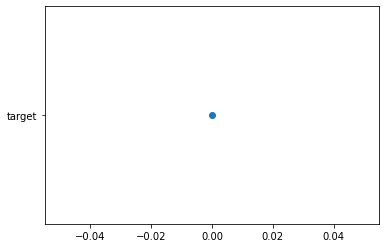

In [34]:
from matplotlib import pyplot as plt
plt.plot('target', marker = 'o')
plt.show()

In [35]:
#fetching the values of each category in target column
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

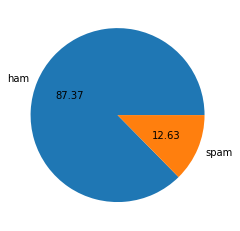

In [36]:
#plot the ratio of ham vs spam in pie chart
from matplotlib import pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [37]:
df.sample(4)

,target,text
3320,0,Yo im right by yo work
5329,0,"Sir, waiting for your letter."
2071,0,Good night my dear.. Sleepwell&amp;Take care
838,1,We tried to contact you re our offer of New Vi...


In [38]:
#convert the object data into numeric data
#target: nos->One Hot Encoding, Label Encoder,map function, pd.get_dummies
#text: numeric-> BOW, TF-IDF,word2vec,cbow,skipgram,sent2vec

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

<ipython-input-39-75f1714d0e5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=encoder.fit_transform(df['target'])


In [40]:
df.sample(4)

,target,text
4302,0,Yup i'm free...
4880,0,When/where do I pick you up
208,0,You please give us connection today itself bef...
4087,0,He needs to stop going to bed and make with th...


In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
import nltk
df['total_chars'] = df['text'].apply(len)
df['total_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['total_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

<ipython-input-42-c2a5462ac866>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_chars'] = df['text'].apply(len)
<ipython-input-42-c2a5462ac866>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
<ipython-input-42-c2a5462ac866>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,target,text,total_chars,total_words,total_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
df.head()

,target,text,total_chars,total_words,total_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [44]:
df.duplicated().sum()

0

In [45]:
df.drop_duplicates(inplace=True)

<ipython-input-45-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [46]:
df.duplicated().sum()

0

In [47]:
df['num_characters']=df['text'].apply(len)

<ipython-input-47-2d4713a058a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [48]:
df.head(6)

,target,text,total_chars,total_words,total_sent,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,111
1,0,Ok lar... Joking wif u oni...,29,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,155
3,0,U dun say so early hor... U c already then say...,49,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,148


In [49]:
#from nltk.corpus import word_tokenize
df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-49-b7787531a575>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [50]:
df.head()

,target,text,total_chars,total_words,total_sent,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,111,24
1,0,Ok lar... Joking wif u oni...,29,8,2,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,155,37
3,0,U dun say so early hor... U c already then say...,49,13,1,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,61,15


In [51]:
df["num_setntences"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-51-e6a47b779033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_setntences"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [52]:
df.head(4)

,target,text,total_chars,total_words,total_sent,num_characters,num_words,num_setntences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1,49,13,1


In [53]:
#describe
df[df['target']==0][['num_characters','num_words','num_setntences']].describe()

,num_characters,num_words,num_setntences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int64 
 1   text            5169 non-null   object
 2   total_chars     5169 non-null   int64 
 3   total_words     5169 non-null   int64 
 4   total_sent      5169 non-null   int64 
 5   num_characters  5169 non-null   int64 
 6   num_words       5169 non-null   int64 
 7   num_setntences  5169 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 363.4+ KB


In [55]:
df.columns

Index(['target', 'text', 'total_chars', 'total_words', 'total_sent',
       'num_characters', 'num_words', 'num_setntences'],
      dtype='object')

In [56]:
df[df['target']=='ham'][['total_chars','total_words','total_sent']].describe()

,total_chars,total_words,total_sent
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [57]:
df['target']=='ham'

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Name: target, Length: 5169, dtype: bool

In [58]:
df[df['target']=='spam'][['total_chars','total_words','total_sent']].describe()

,total_chars,total_words,total_sent
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [59]:
#ham
df[df['target']==0][['num_characters','num_words','num_setntences']].describe()

,num_characters,num_words,num_setntences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
#spam
df[df['target']==1][['num_characters','num_words','num_setntences']].describe()

,num_characters,num_words,num_setntences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [61]:
df[df['target']=='spam'].head(5)

,target,text,total_chars,total_words,total_sent,num_characters,num_words,num_setntences


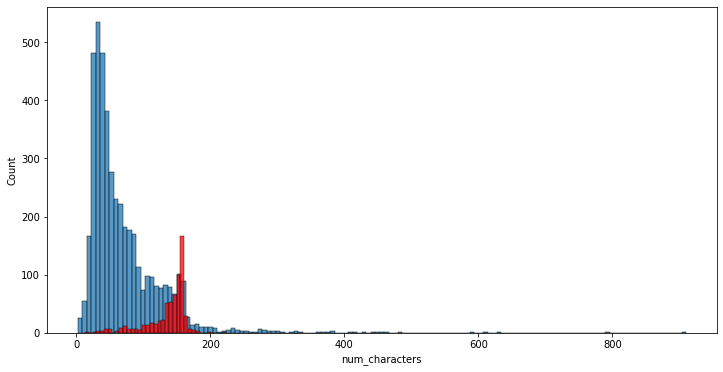

In [62]:
plt.figure(figsize=(12,6))
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

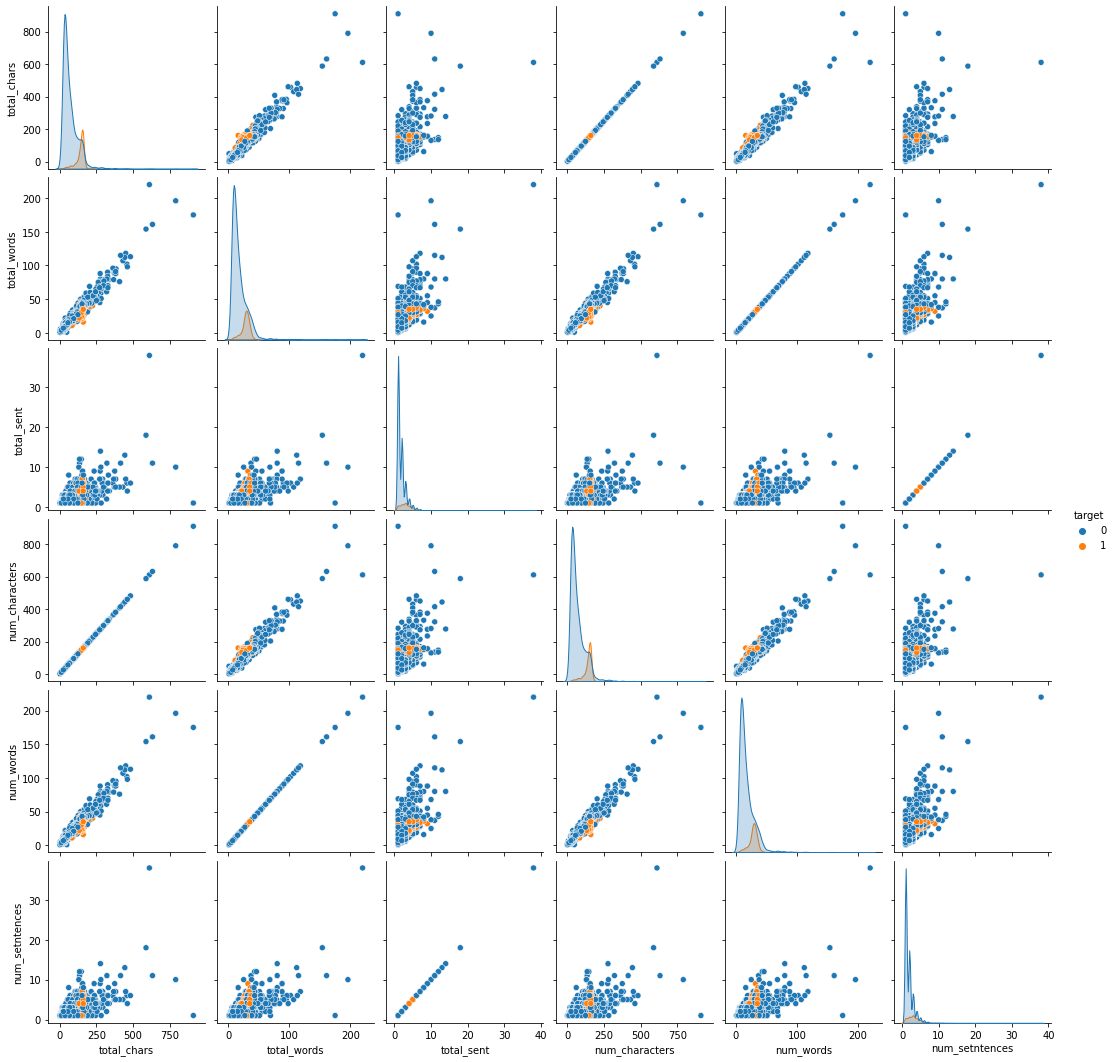

In [63]:
sns.pairplot(df,hue='target')
plt.show()

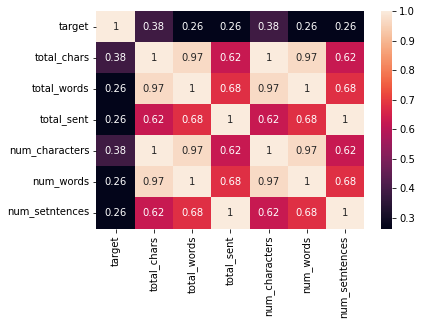

In [64]:
#coorelation
df.corr()
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: >

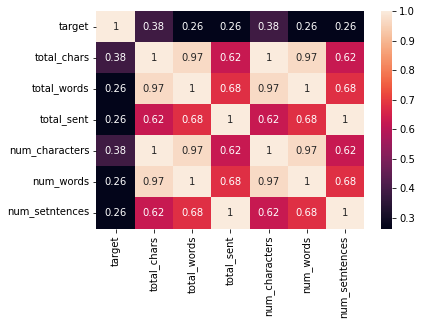

In [65]:
sns.heatmap(df.corr(),annot=True)

In [66]:
#3. Data Preprocessing
#Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming

In [67]:
#data preprocessing: lower
def transform_text(text):
    text=text.lower()
    return text
transform_text("NLP class Welcomes To YOU ALL")

'nlp class welcomes to you all'

In [68]:
#tokenization
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    return text
transform_text("NLP class Welcomes To YOU ALL")

['nlp', 'class', 'welcomes', 'to', 'you', 'all']

In [69]:
#removing special characters
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return y
transform_text("NLP class Welcomes To #YOU ALL@")

['nlp', 'class', 'welcomes', 'to', 'you', 'all']

In [84]:
import nltk
from nltk.corpus import stopwords
#nltk.download("stopwords")
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [85]:
#punctuation
import string
string.punctuation
print(len(string.punctuation))

32


In [87]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [88]:
#final method transfor_text
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [89]:
# Alternative method using Regular Expression
'''import re
corpus=[]
for i in range(len(df)):
  review=re.sub("[^a-zA-Z]"," ",df['text'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)
  '''


'import re\ncorpus=[]\nfor i in range(len(df)):\n  review=re.sub("[^a-zA-Z]"," ",df[\'text\'][i])\n  review=review.lower()\n  review=review.split()\n  review=[ps.stem(word) for word in review if not word in stopwords.words(\'english\')]\n  review=\' \'.join(review)\n  corpus.append(review)\n  '

In [90]:
df['transformed_text'] = df['text'].apply(transform_text)


<ipython-input-90-b507aa02865d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [91]:
df.sample(4)

,target,text,total_chars,total_words,total_sent,num_characters,num_words,num_setntences,transformed_text
1025,0,I have a sore throat. It's scratches when I talk,48,12,2,48,12,2,sore throat scratch talk
1083,0,Wat makes some people dearer is not just de ha...,119,29,2,119,29,2,wat make peopl dearer de happi dat u feel u me...
3198,0,No de.am seeing in online shop so that i asked.,47,11,1,47,11,1,see onlin shop ask
435,0,The message sent is askin for &lt;#&gt; dolla...,89,34,2,89,34,2,messag sent askin lt gt dollar shoul pay lt gt...


In [79]:
#Conversion of text into numeric vector using BOW
#Try for tfidf
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=500)

In [92]:
X=cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 500)

In [81]:
df.head(3)

,target,text,total_chars,total_words,total_sent,num_characters,num_words,num_setntences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,155,37,2


In [93]:
y = df['target'].values

In [94]:
#Splitting of dataset into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [95]:
#4.Model Building using naive bayes classifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [96]:
# Using GaussianNB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7059961315280464
[[594 291]
 [ 13 136]]
0.3185011709601874


In [97]:
# Using MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[875  10]
 [ 19 130]]
0.9285714285714286


In [98]:
# Using BernoulliNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9787234042553191
[[883   2]
 [ 20 129]]
0.9847328244274809


In [99]:
# Find the accuracy score uding tfidf vectorizer
'''
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2500)
'''

'\nfrom sklearn.feature_extraction.text import TfidfVectorizer\ntfidf = TfidfVectorizer(max_features=2500)\n'

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
tfidf= TfidfVectorizer(max_features=2500)

In [102]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
y=df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [103]:
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.5812379110251451
Confusion Matrix of Guassian NB is:  [[535 361]
 [ 72  66]]
Precision score of the Gaussian NB is 0.15456674473067916


In [104]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))


Accuracy score of Gaussian NB is:  0.8568665377176016
Confusion Matrix of Guassian NB is:  [[775 121]
 [ 27 111]]
Precision score of the Gaussian NB is 0.47844827586206895


In [105]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9758220502901354
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 25 113]]
Precision score of the Multinomial NB is 1.0


In [106]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9845261121856866
Confusion Matrix of Bernoulli NB is:  [[895   1]
 [ 15 123]]
Precision score of the Bernoulli NB is 0.9919354838709677
